# Building a model

From the description of the dataset: 

The column, class, lists a binary classification for each stock: -

- For each stock, if the Price Var[%] is positive, class would be 1. From a trading perspective, 1 identifies the stocks that a hypothetical trader should BUY at the start if the year and sell at the end of the year to make a profit.

- For each stock, if the Price Var[%] is negative, class would be 0. From a trading perspective, 0 identifies the stocks that a hypothetical trader should NOT BUY, since their value will decrease, meaning a loss of capital


As such, we will be looking into training a machine learning model (utilizing the class column) so that it learns to classify those stocks that are buy-worthy and not buy-worthy.

The first of such model we will be looking at is a Multi-Variate Classification tree. 

Utilizing the factors that we have identified in our EDA, we will attempt create a model to reliably classify the different stocks into either class 0 or 1. 

This will allow us to reliably predict if a stock is worth buying at the start of the year and holding on to it until the end of the year, where one can sell it for profit.


## Multi-variate Classification Tree

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set

from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('2014_filtered.txt')
df

,Revenue,EBITDA,Profit Margin,returnOnEquity,Book Value per Share,Operating Cash Flow,Dividend Yield,R&D Expenses,PRICE VAR [%],Class,Sector
0,5.727000e+09,683400000.0,0.066,0.2041,6.706,634100000.0,0.0173,0.0,18.603845,1,Consumer Defensive
1,4.551600e+09,241900000.0,-0.021,-0.1154,2.211,536500000.0,0.0117,0.0,26.681241,1,Consumer Defensive
2,2.464867e+09,771439000.0,0.196,0.3189,3.020,597491000.0,0.0000,0.0,37.721889,1,Consumer Defensive
3,3.297600e+09,743500000.0,0.126,0.1969,7.779,540300000.0,0.0157,0.0,10.792636,1,Consumer Defensive
4,5.973810e+08,183876000.0,0.122,0.1289,10.909,111582000.0,0.0000,0.0,49.607672,1,Consumer Defensive
...,...,...,...,...,...,...,...,...,...,...,...
1516,1.185080e+08,9650000.0,0.034,0.1324,4.249,7612000.0,0.0000,0.0,-2.453386,0,Technology
1517,4.952987e+07,-53213.0,-0.002,-0.0097,4.505,523987.0,0.0000,0.0,29.362884,1,Technology
1518,1.532400e+08,20887000.0,0.085,0.3646,2.426,-1587000.0,0.0000,11326000.0,-31.167763,0,Technology
1519,3.407580e+08,8512000.0,0.017,0.1456,8.489,5745000.0,0.0395,0.0,7.779579,1,Technology


In [4]:
y = pd.DataFrame(df["Class"])

predictors = pd.DataFrame(df[["Revenue", "EBITDA", "Profit Margin", "returnOnEquity", "Book Value per Share", 
                                 "Operating Cash Flow", "Dividend Yield", "R&D Expenses"]])
X = predictors

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6149122807017544
True Postitive Rate 		: 0.5490566037735849
True Negative Rate 		: 0.6721311475409836
False Negative Rate 		: 0.4509433962264151
False Postitive Rate 		: 0.32786885245901637

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5853018372703412
True Postitive Rate 		: 0.47619047619047616
True Negative Rate 		: 0.6927083333333334
False Negative Rate 		: 0.5238095238095238
False Postitive Rate 		: 0.3072916666666667



<AxesSubplot:>

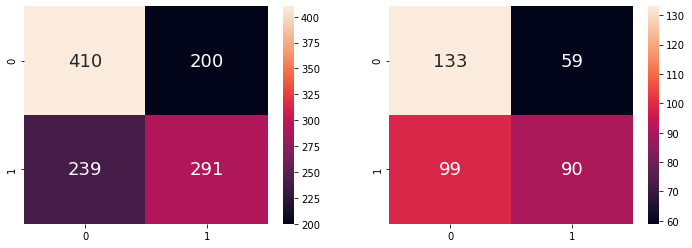

In [15]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

dectree = DecisionTreeClassifier(max_depth = 2)
dectree.fit(X_train, y_train)

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

#Getting the confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred)

TP_train = train_confusion[1][1]
FN_train = train_confusion[1][0]
TN_train = train_confusion[0][0]
FP_train = train_confusion[0][1]

test_confusion = confusion_matrix(y_test, y_test_pred)

TP_test = test_confusion[1][1]
FN_test = test_confusion[1][0]
TN_test = test_confusion[0][0]
FP_test = test_confusion[0][1]


# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print("True Postitive Rate \t\t:", TP_train/(TP_train+FN_train))
print("True Negative Rate \t\t:", TN_train/(TN_train+FP_train))
print("False Negative Rate \t\t:", FN_train/(FN_train+TP_train))
print("False Postitive Rate \t\t:", FP_train/(FP_train+TN_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print("True Postitive Rate \t\t:", TP_test/(TP_test+FN_test))
print("True Negative Rate \t\t:", TN_test/(TN_test+FP_test))
print("False Negative Rate \t\t:", FN_test/(FN_test+TP_test))
print("False Postitive Rate \t\t:", FP_test/(FP_test+TN_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(334.8, 543.6, 'Profit Margin <= 0.071\ngini = 0.498\nsamples = 1140\nvalue = [610, 530]\nclass = 0'),
 Text(167.4, 326.16, 'R&D Expenses <= 67490.5\ngini = 0.465\nsamples = 649\nvalue = [410, 239]\nclass = 0'),
 Text(83.7, 108.72000000000003, 'gini = 0.475\nsamples = 544\nvalue = [333, 211]\nclass = 0'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.391\nsamples = 105\nvalue = [77, 28]\nclass = 0'),
 Text(502.20000000000005, 326.16, 'Revenue <= 98559136.0\ngini = 0.483\nsamples = 491\nvalue = [200, 291]\nclass = 1'),
 Text(418.5, 108.72000000000003, 'gini = 0.359\nsamples = 162\nvalue = [38, 124]\nclass = 1'),
 Text(585.9, 108.72000000000003, 'gini = 0.5\nsamples = 329\nvalue = [162, 167]\nclass = 1')]

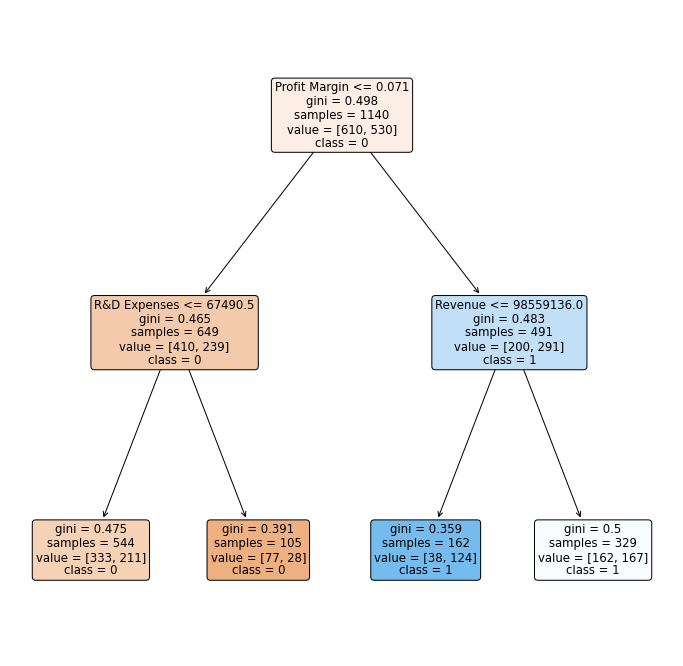

In [16]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["0","1"])

The model with a depth of 2 has a Classification Accuracy of 0.61 for the train set and 0.58 for the test set.

Looking to improve the Classification accuracy for the test set, we looked into increasing the depth of the classification tree.

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6622807017543859
True Postitive Rate 		: 0.5403377110694184
True Negative Rate 		: 0.7693574958813838
False Negative Rate 		: 0.4596622889305816
False Postitive Rate 		: 0.23064250411861614

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5774278215223098
True Postitive Rate 		: 0.43548387096774194
True Negative Rate 		: 0.7128205128205128
False Negative Rate 		: 0.5645161290322581
False Postitive Rate 		: 0.28717948717948716



<AxesSubplot:>

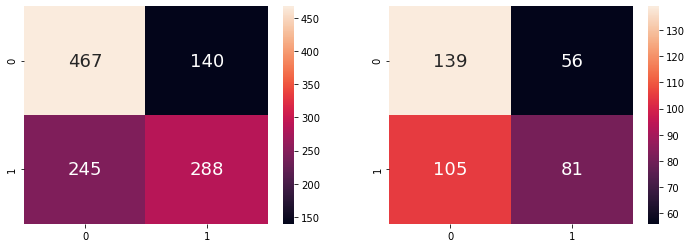

In [27]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

dectree = DecisionTreeClassifier(max_depth = 4)
dectree.fit(X_train, y_train)

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

#Getting the confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred)

TP_train = train_confusion[1][1]
FN_train = train_confusion[1][0]
TN_train = train_confusion[0][0]
FP_train = train_confusion[0][1]

test_confusion = confusion_matrix(y_test, y_test_pred)

TP_test = test_confusion[1][1]
FN_test = test_confusion[1][0]
TN_test = test_confusion[0][0]
FP_test = test_confusion[0][1]

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print("True Postitive Rate \t\t:", TP_train/(TP_train+FN_train))
print("True Negative Rate \t\t:", TN_train/(TN_train+FP_train))
print("False Negative Rate \t\t:", FN_train/(FN_train+TP_train))
print("False Postitive Rate \t\t:", FP_train/(FP_train+TN_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print("True Postitive Rate \t\t:", TP_test/(TP_test+FN_test))
print("True Negative Rate \t\t:", TN_test/(TN_test+FP_test))
print("False Negative Rate \t\t:", FN_test/(FN_test+TP_test))
print("False Postitive Rate \t\t:", FP_test/(FP_test+TN_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

The model with a depth of 4 has a classification accuracy of 0.66 for the train dataset and 0.57 for the test dataset. 

Compared to the previous model with a depth of 2, it has a lower classification accuracy for the test set but higher classification accuracy for the train set. This implies that the model fo depth 4 might be overfitting the data and is thus, not reliable. As such, the model of depth 2 is more reliable. 

Looking to improve our model and get better classification accuracy, we looked into another machine learning model: Random Forest Classification. 

## Random Forest

In [28]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

<ipython-input-40-7bc6f316b3bf>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest.fit(X_train, y_train)                         # train the model


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6877192982456141
True Postitive Rate 		: 0.47309833024118736
True Negative Rate 		: 0.8801996672212978
False Negative Rate 		: 0.5269016697588126
False Postitive Rate 		: 0.11980033277870217

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6220472440944882
True Postitive Rate 		: 0.4222222222222222
True Negative Rate 		: 0.8009950248756219
False Negative Rate 		: 0.5777777777777777
False Postitive Rate 		: 0.19900497512437812



<AxesSubplot:>

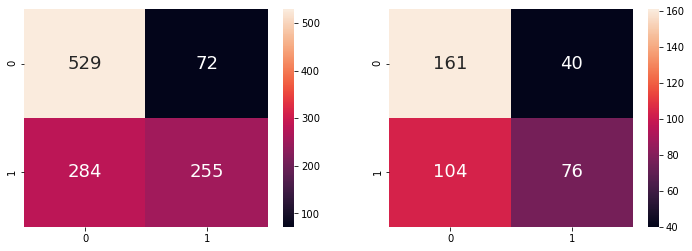

In [40]:
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 2)       # set the maximum depth of each tree

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Random Forest using Train Data
rforest = RandomForestClassifier(n_estimators = 100, max_depth = 4)  # create the object
rforest.fit(X_train, y_train)                         # train the model

# Predict Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

#Getting the confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred)

TP_train = train_confusion[1][1]
FN_train = train_confusion[1][0]
TN_train = train_confusion[0][0]
FP_train = train_confusion[0][1]

test_confusion = confusion_matrix(y_test, y_test_pred)

TP_test = test_confusion[1][1]
FN_test = test_confusion[1][0]
TN_test = test_confusion[0][0]
FP_test = test_confusion[0][1]

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X_train, y_train))
print("True Postitive Rate \t\t:", TP_train/(TP_train+FN_train))
print("True Negative Rate \t\t:", TN_train/(TN_train+FP_train))
print("False Negative Rate \t\t:", FN_train/(FN_train+TP_train))
print("False Postitive Rate \t\t:", FP_train/(FP_train+TN_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X_test, y_test))
print("True Postitive Rate \t\t:", TP_test/(TP_test+FN_test))
print("True Negative Rate \t\t:", TN_test/(TN_test+FP_test))
print("False Negative Rate \t\t:", FN_test/(FN_test+TP_test))
print("False Postitive Rate \t\t:", FP_test/(FP_test+TN_test))
print()


# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(train_confusion,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(test_confusion, 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Utilizing the random forest model of approximately 100 trees of depth 2, we managed to obtain a classification accuracy of approximately 0.68 for the training data set and a classification accuracy of approximately 0.62 for the test data set. 

Looking to refine the classification accuracy, we looked into changing the n-estimators and depth of the tree.

<ipython-input-60-be62f3f3c777>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest.fit(X_train, y_train)                         # train the model


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6964912280701754
True Postitive Rate 		: 0.5338208409506399
True Negative Rate 		: 0.8465430016863407
False Negative Rate 		: 0.46617915904936014
False Postitive Rate 		: 0.15345699831365936

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6666666666666666
True Postitive Rate 		: 0.5174418604651163
True Negative Rate 		: 0.7894736842105263
False Negative Rate 		: 0.48255813953488375
False Postitive Rate 		: 0.21052631578947367



<AxesSubplot:>

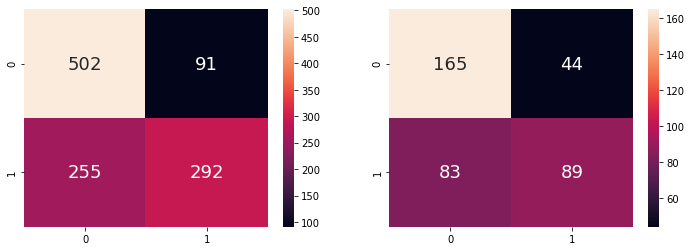

In [60]:
rforest = RandomForestClassifier(n_estimators = 500,  # n_estimators denote number of trees
                                 max_depth = 4)       # set the maximum depth of each tree

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Random Forest using Train Data
rforest = RandomForestClassifier(n_estimators = 100, max_depth = 4)  # create the object
rforest.fit(X_train, y_train)                         # train the model

# Predict Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

#Getting the confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred)

TP_train = train_confusion[1][1]
FN_train = train_confusion[1][0]
TN_train = train_confusion[0][0]
FP_train = train_confusion[0][1]

test_confusion = confusion_matrix(y_test, y_test_pred)

TP_test = test_confusion[1][1]
FN_test = test_confusion[1][0]
TN_test = test_confusion[0][0]
FP_test = test_confusion[0][1]

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X_train, y_train))
print("True Postitive Rate \t\t:", TP_train/(TP_train+FN_train))
print("True Negative Rate \t\t:", TN_train/(TN_train+FP_train))
print("False Negative Rate \t\t:", FN_train/(FN_train+TP_train))
print("False Postitive Rate \t\t:", FP_train/(FP_train+TN_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X_test, y_test))
print("True Postitive Rate \t\t:", TP_test/(TP_test+FN_test))
print("True Negative Rate \t\t:", TN_test/(TN_test+FP_test))
print("False Negative Rate \t\t:", FN_test/(FN_test+TP_test))
print("False Postitive Rate \t\t:", FP_test/(FP_test+TN_test))
print()


# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(train_confusion,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(test_confusion, 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Utilizing the random forest model of approximately 500 trees of depth 4, we managed to obtain a classification accuracy of approximately 0.69 for the training data set and a classification accuracy of approximately 0.66 for the test data set.

While the classification accuracy for the training and test set have improved using this model. 

Comparing this random forest model and the multivariate classification tree model, we can see that there is an increase in the classification accuracy for both the train(0.69-r.forest vs 0.66-c.tree) and test data sets(0.66-r.forest vs 0.57-c.tree). 

Seeking to refine our random forest model, we decided to look into GridSearch to help us hypertune our parameters such that our model would be more accurate.

## Hypertuning with GridSearchCV

In [61]:
# Import GridSearchCV from Scikit-Learn
from sklearn.model_selection import GridSearchCV

In [62]:
# Create the param grid
param_grid = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 500, num = 100)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [2,6],
               'min_samples_split': [2, 5],
               'min_samples_leaf': [1, 2],
               'bootstrap': [True, False]}

rf_Model = RandomForestClassifier()

rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [63]:
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 3200 candidates, totalling 9600 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   11.2s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   30.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:   54.9s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:  2.8min
[Parallel(n_jobs=4)]: Done 2584 tasks      | elapsed:  3.8min
[Parallel(n_jobs=4)]: Done 3273 tasks      | elapsed:  5.0min
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed:  6.3min
[Parallel(n_jobs=4)]: Done 4893 tasks      | elapsed:  7.8min
[Parallel(n_jobs=4)]: Done 5824 tasks      | elapsed:  9.0min
[Parallel(n_jobs=4)]: Done 6837 tasks      | elapsed: 10.3min
[Parallel(n_jobs=4)]: Done 7930 tasks      | elapsed: 11.9min
[Parallel(n_jobs=4)]: Done 9105 tasks      | elapsed: 13.9min

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 6],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 104, 108, 112, 116, 120, 124,
                                          128, 132, 136, 140, 144, 148, 152,
                                          156, 160, 164, 168, 172, 176, 180,
                                          184, 188, 192, 196, 201, 205, 209,
                                          213, 217, ...]},
             verbose=2)

In [64]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 350}

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7798245614035088
True Postitive Rate 		: 0.6672760511882998
True Negative Rate 		: 0.8836424957841484
False Negative Rate 		: 0.3327239488117002
False Postitive Rate 		: 0.1163575042158516

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6745406824146981
True Postitive Rate 		: 0.5406976744186046
True Negative Rate 		: 0.784688995215311
False Negative Rate 		: 0.45930232558139533
False Postitive Rate 		: 0.215311004784689



<AxesSubplot:>

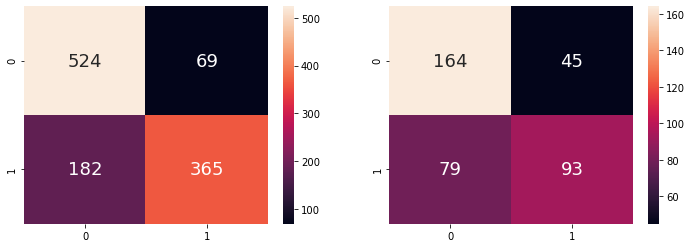

In [66]:
# Predict Response corresponding to Predictors
y_train_pred = rf_Grid.predict(X_train)
y_test_pred = rf_Grid.predict(X_test)

train_confusion = confusion_matrix(y_train, y_train_pred)

TP_train = train_confusion[1][1]
FN_train = train_confusion[1][0]
TN_train = train_confusion[0][0]
FP_train = train_confusion[0][1]

test_confusion = confusion_matrix(y_test, y_test_pred)

TP_test = test_confusion[1][1]
FN_test = test_confusion[1][0]
TN_test = test_confusion[0][0]
FP_test = test_confusion[0][1]

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rf_Grid.score(X_train, y_train))
print("True Postitive Rate \t\t:", TP_train/(TP_train+FN_train))
print("True Negative Rate \t\t:", TN_train/(TN_train+FP_train))
print("False Negative Rate \t\t:", FN_train/(FN_train+TP_train))
print("False Postitive Rate \t\t:", FP_train/(FP_train+TN_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rf_Grid.score(X_test, y_test))
print("True Postitive Rate \t\t:", TP_test/(TP_test+FN_test))
print("True Negative Rate \t\t:", TN_test/(TN_test+FP_test))
print("False Negative Rate \t\t:", FN_test/(FN_test+TP_test))
print("False Postitive Rate \t\t:", FP_test/(FP_test+TN_test))
print()


# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(train_confusion,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(test_confusion, 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])